In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

try:
    loaded_data = np.loadtxt('../datafile/diabetes.csv', delimiter=',')

    x_data = loaded_data[:, :-1]
    t_data = loaded_data[:, [-1]]

    print(x_data.shape, t_data.shape)

except Exception as err:
    print(str(err))

(759, 8) (759, 1)


In [4]:
model = Sequential()
model.add(Dense(t_data.shape[1], 
                input_shape=(x_data.shape[1], ), 
                activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer=SGD(learning_rate=1e-2), 
              metrics=['accuracy'])
hist = model.fit(x_data, t_data, epochs=1000, validation_split=0.2)

Epoch 1/1000
19/19 [==============================] - 1s 11ms/step - loss: 0.8153 - accuracy: 0.3756 - val_loss: 0.8254 - val_accuracy: 0.2961
Epoch 2/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.7977 - accuracy: 0.3987 - val_loss: 0.8092 - val_accuracy: 0.3092
Epoch 3/1000
19/19 [==============================] - 0s 4ms/step - loss: 0.7828 - accuracy: 0.4102 - val_loss: 0.7954 - val_accuracy: 0.3355
Epoch 4/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.7702 - accuracy: 0.4300 - val_loss: 0.7837 - val_accuracy: 0.3882
Epoch 5/1000
19/19 [==============================] - 0s 4ms/step - loss: 0.7593 - accuracy: 0.4695 - val_loss: 0.7736 - val_accuracy: 0.4145
Epoch 6/1000
19/19 [==============================] - 0s 4ms/step - loss: 0.7500 - accuracy: 0.4827 - val_loss: 0.7649 - val_accuracy: 0.4539
Epoch 7/1000
19/19 [==============================] - 0s 4ms/step - loss: 0.7420 - accuracy: 0.4975 - val_loss: 0.7574 - val_accuracy: 0.4803
Epoch

In [5]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.7721


[0.4748460054397583, 0.7720685005187988]

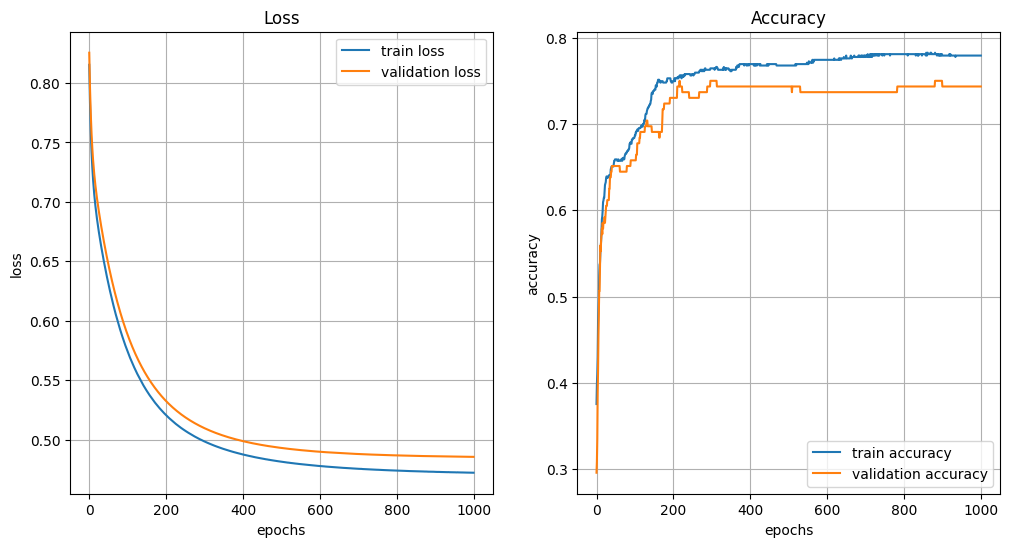

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()